In [1]:
#import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import datetime as dt 

In [2]:
#load data
df = pd.read_csv('pool_data_202211111622.csv')

In [3]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43635 entries, 0 to 43634
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pool_id                43635 non-null  int64  
 1   time_stamp             43635 non-null  object 
 2   salinity               43604 non-null  float64
 3   flow switch            31 non-null     float64
 4   flow meter             0 non-null      float64
 5   turbidity              43604 non-null  float64
 6   ORP                    43635 non-null  float64
 7   PH                     43635 non-null  float64
 8   TDS                    43604 non-null  float64
 9   Pressure in tank       0 non-null      float64
 10  Pressure in            43604 non-null  float64
 11  Pressure out           43604 non-null  float64
 12  Pump RPM               0 non-null      float64
 13  pump current           43604 non-null  float64
 14  dis_feeder             0 non-null      float64
 15  ph

In [4]:
df.head()

,pool_id,time_stamp,salinity,flow switch,flow meter,turbidity,ORP,PH,TDS,Pressure in tank,...,Shw msg,Drain,Human Counter,temperature,water level,cppm,phfeedtime,orpfeedtime,bather in from mens,bather in from ladies
0,10001,2022-11-01 11:01:16.220 -0400,287.175,NaN,NaN,9.51440,774.049,7.41573,287.175,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
1,10001,2022-11-01 11:01:26.323 -0400,287.175,NaN,NaN,9.35767,773.597,7.41573,287.175,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
2,10001,2022-11-01 11:01:36.386 -0400,287.121,NaN,NaN,9.35767,773.869,7.41889,287.121,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
3,10001,2022-11-01 11:01:46.498 -0400,287.248,NaN,NaN,8.57397,773.959,7.41193,287.248,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
4,10001,2022-11-01 11:01:56.554 -0400,287.175,NaN,NaN,8.88745,773.597,7.41699,287.157,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.drop(['flow switch', 'flow meter', 'Pressure in tank', 'Pump RPM', 'dis_feeder', 'ph_feeder', 'Shw msg', 'cppm', 'phfeedtime', 'orpfeedtime', 'bather in from mens', 'bather in from ladies'], axis=1)
df.head()

,pool_id,time_stamp,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Fresh water,Drain,Human Counter,temperature,water level
0,10001,2022-11-01 11:01:16.220 -0400,287.175,9.51440,774.049,7.41573,287.175,2.53581,2.53346,0.0,0.0,0.0,0.0,74.2574,500.0
1,10001,2022-11-01 11:01:26.323 -0400,287.175,9.35767,773.597,7.41573,287.175,2.53508,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0
2,10001,2022-11-01 11:01:36.386 -0400,287.121,9.35767,773.869,7.41889,287.121,2.53526,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0
3,10001,2022-11-01 11:01:46.498 -0400,287.248,8.57397,773.959,7.41193,287.248,2.53545,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0
4,10001,2022-11-01 11:01:56.554 -0400,287.175,8.88745,773.597,7.41699,287.157,2.53508,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0


pool_id: id of the pool

time_stamp: the time in which the data is recorded

salinity: the amount of salt dissolved in the water (g/kg in ppm)

turbidity: measure of relative clarity of water (NTU)

ORP: oxidation-reduction potential (mV)

pH: acidity measurement (pH)

TDS: total dissolved solid (mg/L in ppm)

Pressure in: pressure measurement near the water inlet (bar)

Pressure out: pressure measurement near the water outlet (bar)

Pump current:

Human Counter:

Fresh water

temperature: temperature in the pool (F); <b> per client, desired temp 75.2 - 77 </b>

water level: level of water

<b> client mentioned they wanted to optimize energy consumption but we do not currently have that data </b>

In [6]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#stroke_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'

missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by='count', ascending = False)

,count,%
salinity,31,0.071044
turbidity,31,0.071044
TDS,31,0.071044
Pressure in,31,0.071044
Pressure out,31,0.071044
pump current,31,0.071044
Fresh water,31,0.071044
Drain,31,0.071044
Human Counter,31,0.071044
water level,31,0.071044


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pool_id,43635.0,10001.000000,0.000000,10001.000000,10001.00000,10001.00000,10001.00000,10001.00000
salinity,43604.0,277.844371,7.997543,0.000000,273.95500,277.39100,281.46100,557.57500
turbidity,43604.0,21.799282,71.822268,-4375.260000,22.02250,27.35210,33.30830,46.94560
ORP,43635.0,745.472058,53.136355,0.000000,741.40700,758.40600,766.36400,3002.87000
PH,43635.0,6.334087,2.650337,-11.099353,7.38977,7.41636,7.44927,20.74010
TDS,43604.0,277.844096,7.997437,0.000000,273.95500,277.39100,281.46100,557.57500
Pressure in,43604.0,2.518673,0.135535,-5.925750,2.51212,2.52206,2.52387,2.54503
Pressure out,43604.0,2.520375,0.057463,0.000000,2.51085,2.52044,2.52224,5.92575
pump current,43604.0,14.425126,892.269724,0.000000,0.00000,0.00000,0.00000,56183.10000
Fresh water,43604.0,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000


In [8]:
#drop row with missing data
df = df.dropna()

In [9]:
#time_stamp as index
df = df.set_index('time_stamp')
df.head()

,pool_id,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Fresh water,Drain,Human Counter,temperature,water level
time_stamp,,,,,,,,,,,,,,
2022-11-01 11:01:16.220 -0400,10001,287.175,9.51440,774.049,7.41573,287.175,2.53581,2.53346,0.0,0.0,0.0,0.0,74.2574,500.0
2022-11-01 11:01:26.323 -0400,10001,287.175,9.35767,773.597,7.41573,287.175,2.53508,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0
2022-11-01 11:01:36.386 -0400,10001,287.121,9.35767,773.869,7.41889,287.121,2.53526,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0
2022-11-01 11:01:46.498 -0400,10001,287.248,8.57397,773.959,7.41193,287.248,2.53545,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0
2022-11-01 11:01:56.554 -0400,10001,287.175,8.88745,773.597,7.41699,287.157,2.53508,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0


<AxesSubplot:>

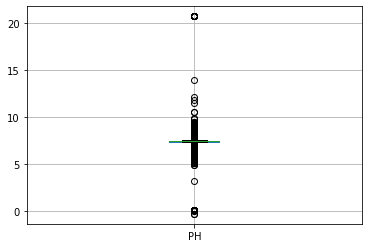

In [10]:
df[['PH']].boxplot()

Need to ask about the high range of pH 

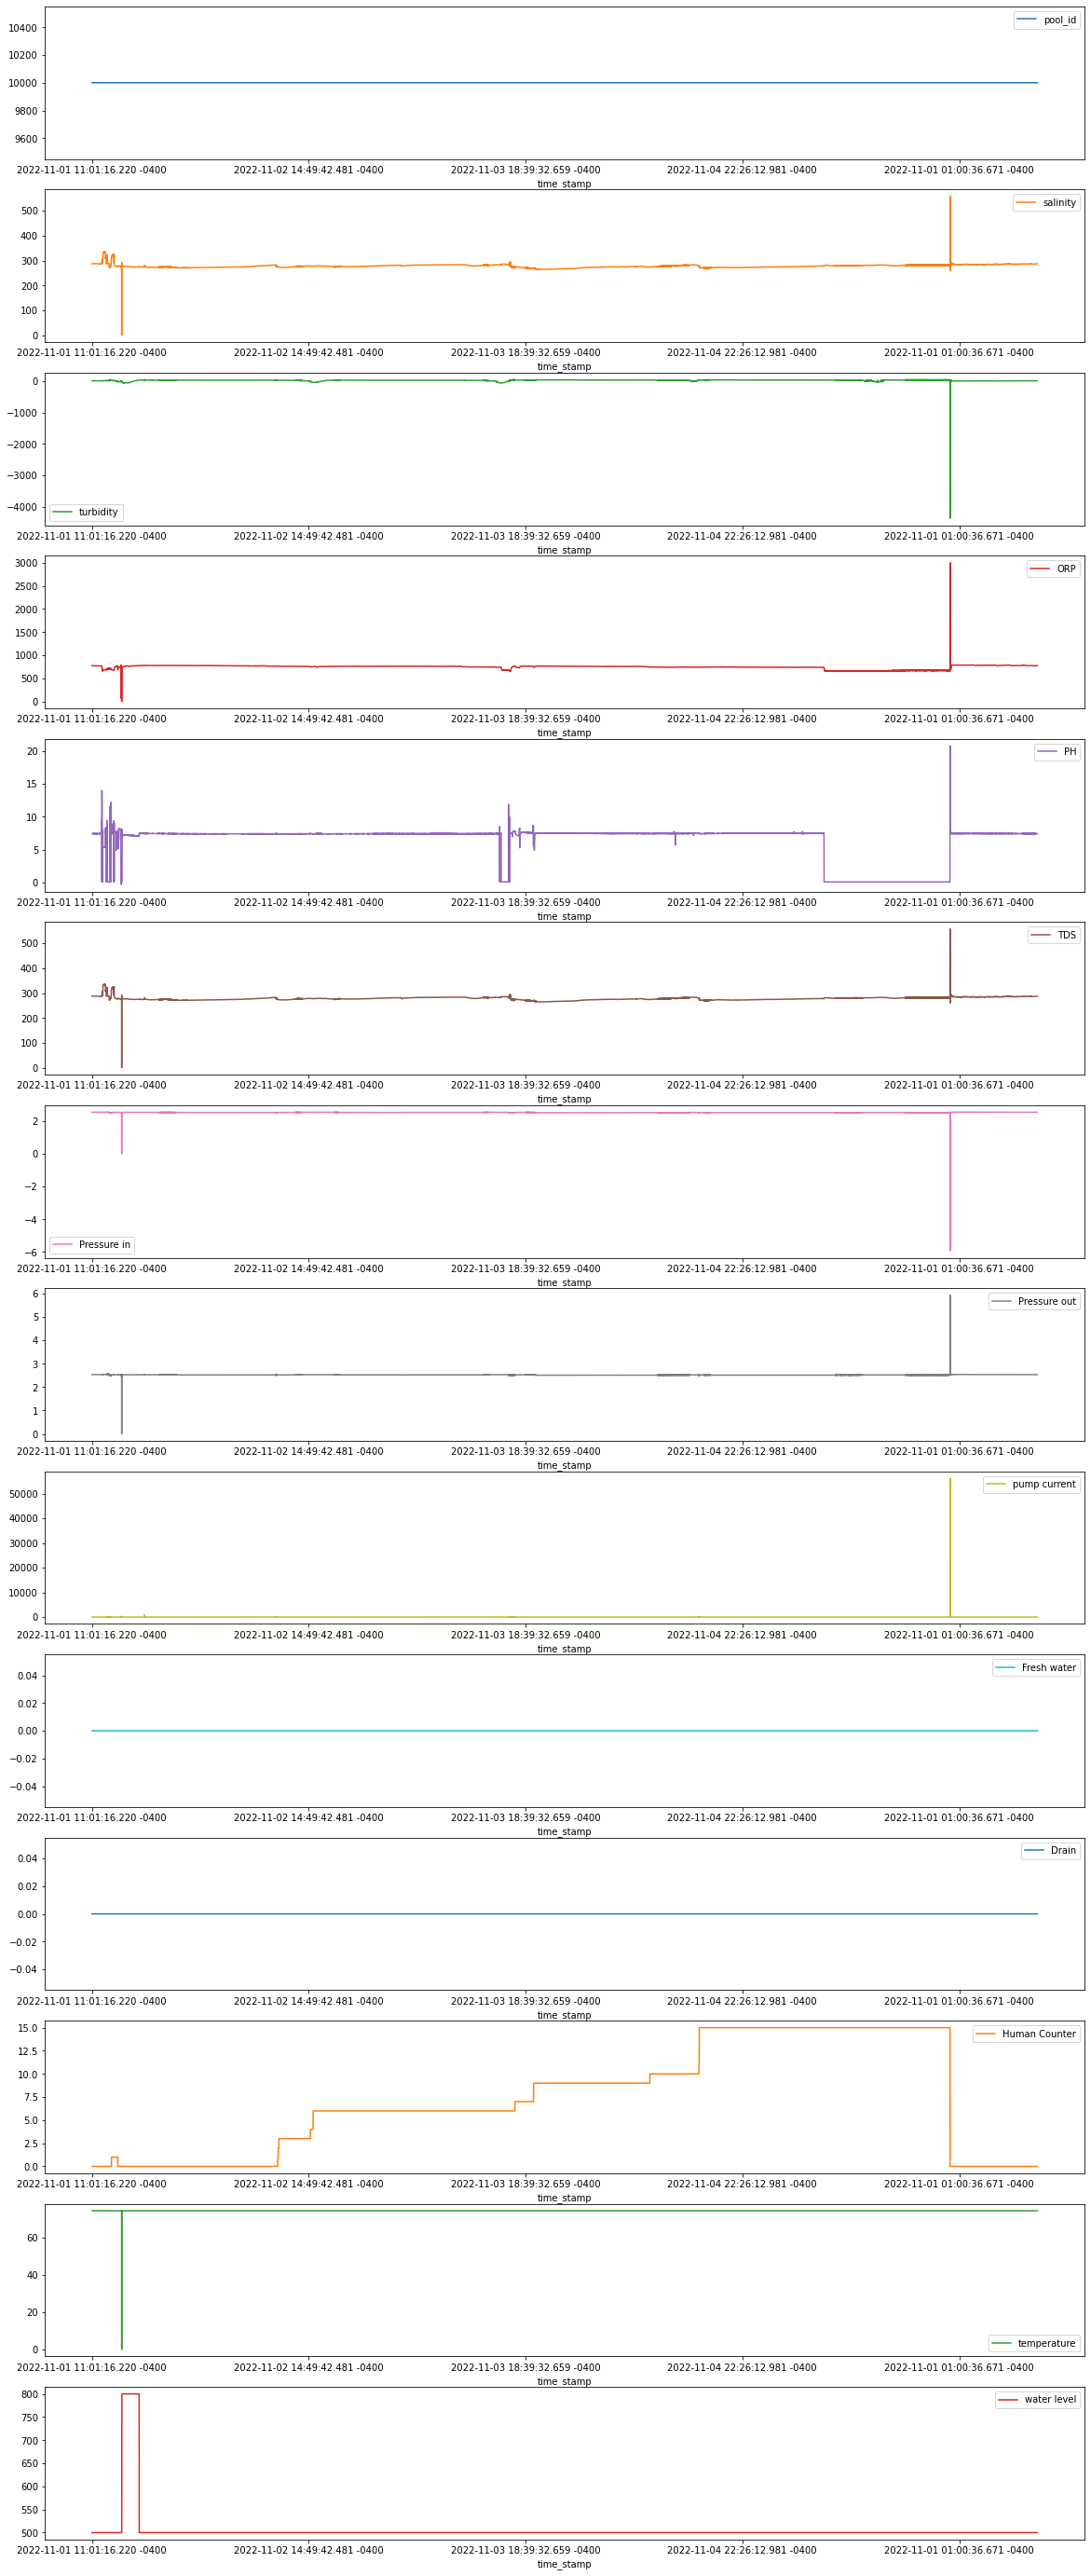

In [11]:
df.plot(subplots=True, 
          figsize = (20,50),
          sharex=False, 
          sharey=False)
          
plt.show()